# Multiclass Classification
Classifying more-than-two labels/classes. Could be 3, could be 100.  
Steps:
- **get data ready** (create tensors from dataset)
- **build a model**: diy or pre-trained
- **fit the model** to the data, make predictions
- **evaluate the model**: how'd it do?
- **Experimentation**: do better
- **save & reload the model**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Import Data: Fashion Items
60K items.  
28x28 images.  
[fashion_mnist dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(f'Training Data:\n{train_data[0]}')
print(f'Training Label:\n{train_labels[0]}')

Training Data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [4]:
print(f'data shape: {train_data[0].shape}')

data shape: (28, 28)


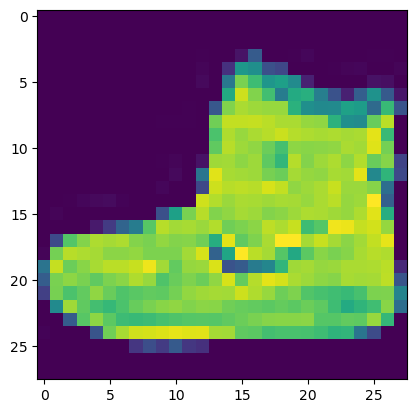

In [5]:
plt.imshow(train_data[0])

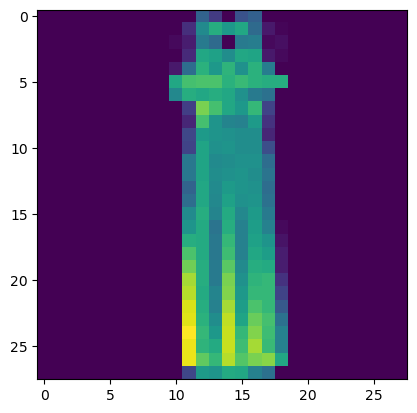

In [6]:
plt.imshow(train_data[250])

## Prep A Label-List
The labels can be found in the [readme](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#labels)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
len(class_names)

10

## Visualize An Image And It's label

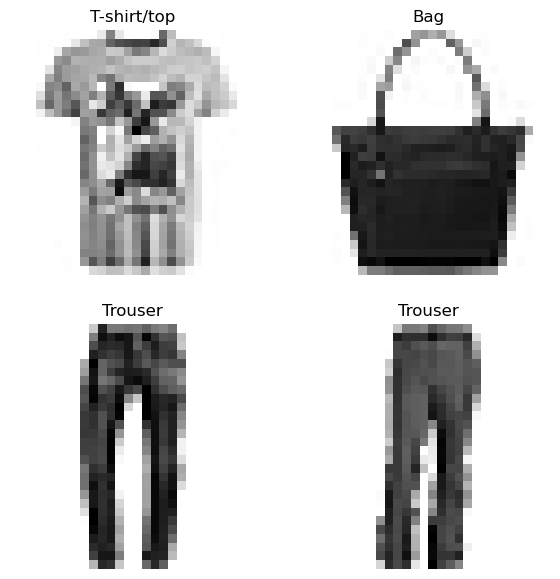

In [9]:
# 
# A SINGLE image
# 
 
# itm_idx = 122
# imgItm = train_data[itm_idx]
# labelItm = train_labels[itm_idx]
# label = class_names[labelItm]
# plt.imshow(imgItm, cmap=plt.cm.binary)
# plt.title(label)


# MULTIPLE
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build A Model
### First Go

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
m1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = m1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 2.2973 - accuracy: 0.1124 - val_loss: 2.1424 - val_accuracy: 0.1842
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.8781 - accuracy: 0.2254 - val_loss: 1.7629 - val_accuracy: 0.2463
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6983 - accuracy: 0.2605 - val_loss: 1.6627 - val_accuracy: 0.2633
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6566 - accuracy: 0.2622 - val_loss: 1.6325 - val_accuracy: 0.2741
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6321 - accuracy: 0.2705 - val_loss: 1.6259 - val_accuracy: 0.2751
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6222 - accuracy: 0.2733 - val_loss: 1.6181 - val_accuracy: 0.2805
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6066 - accuracy: 0.2791 - val_loss: 1.6061 - val_ac

### View Model Stats

In [11]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
train_data.min(), train_data.max()

(0, 255)

## Normalize: Scale The Training Data between 0-1

In [13]:
normalizedTrainData = train_data / train_data.max()
normalizedTestData = test_data / train_data.max()

In [14]:
normalizedTrainData.min(), normalizedTrainData.max()

(0.0, 1.0)

## Model 2: Use Normalized Data

In [16]:
tf.random.set_seed(42)

# Create the model
# m2 = tf.keras.Sequential()
# m2.add(inputLayer)
# m2.add(dense4Relu)
# m2.add(dense4Relu2)
# m2.add(outputLayer)
m2  = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
m2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
m2History = m2.fit(normalizedTrainData,
                          train_labels,
                          epochs=10,
                          validation_data=(normalizedTestData, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.0808 - accuracy: 0.5994 - val_loss: 0.7612 - val_accuracy: 0.7255
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7099 - accuracy: 0.7408 - val_loss: 0.7027 - val_accuracy: 0.7484
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6505 - accuracy: 0.7577 - val_loss: 0.6523 - val_accuracy: 0.7505
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6159 - accuracy: 0.7702 - val_loss: 0.6337 - val_accuracy: 0.7561
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5989 - accuracy: 0.7762 - val_loss: 0.6262 - val_accuracy: 0.7670
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5855 - accuracy: 0.7806 - val_loss: 0.6165 - val_accuracy: 0.7749
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5772 - accuracy: 0.7862 - val_loss: 0.6006 - val_ac

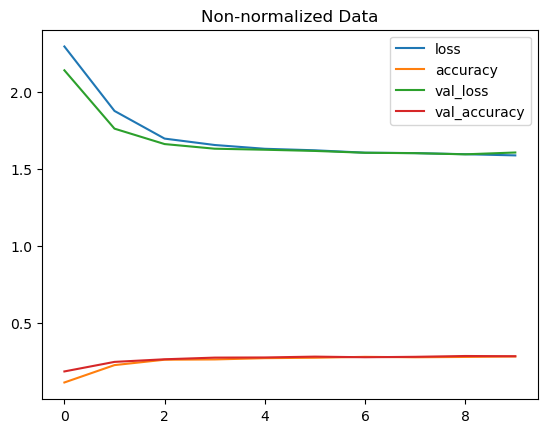

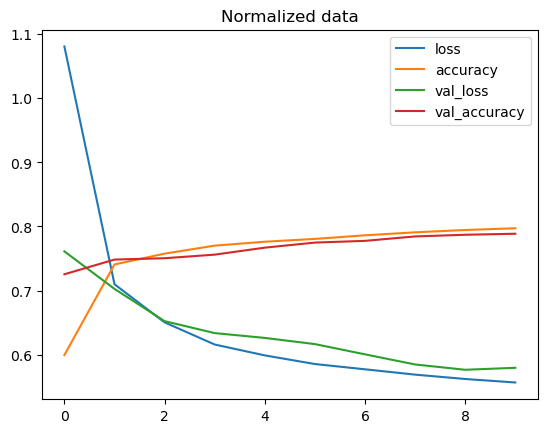

In [17]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(m2History.history).plot(title="Normalized data");